## Non-linear least square

* `DataProblem2019.csv`

In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [4]:
df = pd.read_csv('DataProblem201904.csv', header=None)
data = df.values

In [5]:
y = data[:,0]
y.shape

(1000,)

In [6]:
n = data.shape[0]
X = np.hstack([np.ones((n,1)), data[:,1:3]])
#x0 = np.ones(n)
#x1 = data[:,1]
#x2 = data[:,2]

In [7]:
X[1:5]

array([[1.0, 0.104327738, 0.6739250529999999],
       [1.0, 0.9070093340000001, 0.9653420359999999],
       [1.0, 0.306398899, 0.051448587000000004],
       [1.0, 0.446408872, 0.071265988]], dtype=object)

In [8]:
X.shape

(1000, 3)

In [9]:
X[1].shape

(3,)

In [10]:
def loss(beta):
    sum = 0
    for i in range(n):
        sum += (y[i] - np.dot(X[i], beta))**2
    return sum

In [12]:
minimize(loss, x0=[1,1,1])

      fun: 0.6316619344687827
 hess_inv: array([[ 3.60662538e-03, -3.03446105e-03, -3.08732401e-03],
       [-3.03446105e-03,  5.93858989e-03,  3.49959555e-05],
       [-3.08732401e-03,  3.49959555e-05,  6.05476192e-03]])
      jac: array([-7.45058060e-09,  6.70552254e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([1.94146068, 0.99866844, 3.00444107])

In [13]:
# another initial guess
minimize(loss, x0=[0,0,0])

      fun: 0.631661934468788
 hess_inv: array([[ 3.60679024e-03, -3.03451478e-03, -3.08734202e-03],
       [-3.03451478e-03,  5.93860731e-03,  3.49963249e-05],
       [-3.08734202e-03,  3.49963249e-05,  6.05476795e-03]])
      jac: array([-3.72529030e-07, -1.63912773e-07, -1.93715096e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([1.94146068, 0.99866844, 3.00444107])

### `np.newaxis`

* `np.dot`は多少shapeがおかしくても動いてくれるが，@はshapeをキチンと合わせないとだめっぽい
* `np.newaxis`を使ってshapeを調整

In [65]:
def loss_(beta):
    sum = 0
    for i in range(n):
        sum += (y[i] - X[i][:np.newaxis] @ beta)**2
    return sum

In [14]:
minimize(loss, x0=[1,1,1])

      fun: 0.6316619344687827
 hess_inv: array([[ 3.60662538e-03, -3.03446105e-03, -3.08732401e-03],
       [-3.03446105e-03,  5.93858989e-03,  3.49959555e-05],
       [-3.08732401e-03,  3.49959555e-05,  6.05476192e-03]])
      jac: array([-7.45058060e-09,  6.70552254e-08,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([1.94146068, 0.99866844, 3.00444107])

## Discrete Choice

* `DataMat.csv`

In [62]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [63]:
df = pd.read_csv('DataMat.csv', header=None)
data = df.values
data.shape

(10000, 3)

In [70]:
mu, beta = 0, 1 # location and scale
s = np.random.gumbel(mu, beta, 1000)
s.shape

(1000,)

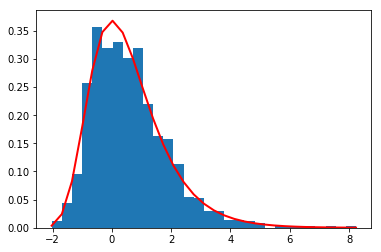

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, (1/beta)*np.exp(-(bins - mu)/beta) * np.exp( -np.exp( -(bins - mu) /beta) ), linewidth=2, color='r')
plt.show()

\[
    u_{ij} = X_i \beta_j + \epsilon_{ij}
\]

Assuming $\epsilon_{ij}$ are independently drawn from Type I extreme value distribution, we have
\[
    \Pr(d_i = j \mid X_t) = \frac{\exp(X_i \beta_j)}{\sum_{k=1}^J \exp(X_i \beta_k)}
\]

Obtain $\beta$ that maximizes the following value
\[
    \prod_{i=1}^n \left( \prod_j \left \{ \frac{\exp(X_i \beta_j)}{\sum_{k=1}^J \exp(X_i \beta_k)} \right\}^{y_{ij}} \right)
\]
where $y_{ij} = 1$ means agent $i$ chooses option $j$.

In [73]:
n = data.shape[0]
k = data.shape[1] - 1
y = 
X = 

In [ ]:
def likelihood(beta):
    